# Giới thiệu

# Chuẩn bị

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D # vẽ biểu đồ 3 chiều

%matplotlib inline

## Thư viện chart
Chúng ta sẽ dùng `seaborn`, một thư viện chart được xây dựng trên `matplotlib` với ưu điểm là dễ sử dụng.

In [0]:
import seaborn as sns
sns.set_style('dark')

## Dữ liệu
### Bộ dữ liệu hoa diên vĩ
Chúng ta sẽ sử dụng dữ liệu về các bông hoa diên vĩ được nhà sinh học Ronald Fisher sử dụng trong một bài báo của mình vào năm 1936. Bộ dữ liệu này đi kèm với thư viện `seaborn`.

Bộ dữ liệu bao gồm các cột :
- `sepal_length`, `sepal_width` : chiều dài, chiều rộng của lá đài (đơn vị : cm)
- `petal_length`, `petal_width` : chiều dài, chiều rộng của cánh hoa (đơn vị : cm)
- `species` : giống hoa diên vĩ

In [5]:
# lấy dữ liệu iris được lưu sẵn trong seaborn
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
#@title Ba giống hoa diên vĩ trong bộ dữ liệu

%%html
<!-- Compiled and minified CSS -->
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">

<!-- Compiled and minified JavaScript -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/js/materialize.min.js"></script>
            
<style>
  .flex {
      display: flex;
  }
  .child1, .child2, .child3 {
      margin: 4px;
  }

  .child2 img, child3 img{
      height: 226px
  }
</style>

<div class="flex">
  <div>
    <div>
      <div class="card child1">
        <div class="card-image">
          <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/440px-Kosaciec_szczecinkowaty_Iris_setosa.jpg">
          <span class="card-title">Iris setosa</span>
        </div>
      </div>
    </div>
  </div>
  <div>
    <div>
      <div>
        <div class="card child2">
          <div class="card-image">
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/440px-Iris_versicolor_3.jpg">
            <span class="card-title">Iris versicolor</span>
          </div>
        </div>
      </div>
    </div>
    <div>
      <div>
        <div class="card child3">
          <div class="card-image">
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/440px-Iris_virginica.jpg">
            <span class="card-title">Iris virginica</span>
          </div>
        </div>
      </div>
    </div>
  </div>
</div>

### Bộ dữ liệu dân số
Dữ liệu được lưu trữ trong `Data/gapminder_data.csv`, bao gồm các cột :
- `country` : quốc gia.
- `continent` : châu lục.
- `year` : năm thống kê.
- `life_expectancy` : tuổi thọ trung bình (đơn vị : tuổi).
- `population` : dân số (đơn vị : người)
- `gdp_per_cap` : GDP bình quân đầu người (đơn vị : USD)

In [42]:
world = pd.read_csv('https://raw.githubusercontent.com/Levytan/MIS.2019/master/Data/gapminder_data.csv')

# dùng dữ liệu năm 2017 để minh họa
world_2007 = world[world.year == 2007].reset_index(drop = True)
world_2007.head()

,country,continent,year,life_expectancy,population,gdp_per_cap
0,Afghanistan,Asia,2007,43.828,31889923,974.580338
1,Albania,Europe,2007,76.423,3600523,5937.029526
2,Algeria,Africa,2007,72.301,33333216,6223.367465
3,Angola,Africa,2007,42.731,12420476,4797.231267
4,Argentina,Americas,2007,75.320,40301927,12779.379640


# Biểu diễn dữ liệu một chiều
Để biểu diễn dữ liệu một chiều, người ta thường dùng đến một trong ba dạng biểu đồ :
- Box plot (biểu đồ hộp)
- Histogram (biểu đồ tần suất)
- KDE (biểu đồ ước lượng mật độ xác suất)

## Box plot

### Giới thiệu

![boxplot](https://i.imgur.com/CQBaJ03.png)

Box plot là dạng biểu đồ mô tả đơn giản phân bố của dữ liệu. Nó bao gồm các thành phần :
1. $median$ hay $Q2$: giá trị trung vị (ở giữa) của bộ dữ liệu được sắp xếp.
2. $Q1$ : giá trị trung vị của bộ dữ liệu lấy từ đầu đến Q2.
3. $Q3$ : giá trị trung vị của bộ dữ liệu lấy từ Q2 đến hết.
4. $IQR$ : khoảng liên phân vị, bằng $Q3 - Q1$.
5. $min$ : bằng $Q1 - 1.5 \times IQR$, đừng nhầm với giá trị nhỏ nhất của dữ liệu.
6. $max$ : bằng $Q3 + 1.5 \times IQR$, đừng nhầm với giá trị lớn nhất của dữ liệu.
7. `outlier` : các giá trị nằm ngoài khoảng $(min, max)$.

Trong đó, trung vị được định nghĩa như sau :
- Nếu bộ dữ liệu có $2n+1$ phần tử, trung vị là phần tử ở vị trí $n+1$.
- Nếu bộ dữ liệu có $2n$ phần tử, trung vị là trung bình cộng của phần tử ở vị trí $n$ và $n+1$.

**Ví dụ 1** : Cho bộ dữ liệu $[6, 7, 15, 36, 39, 40, 41, 42, 43, 47, 49]$. Khi đó :
- $Q2 = 40$ (bộ dữ liệu có 11 phần tử, nên trung vị là phần tử thứ 6).
- $Q1 = (36+15)/2 = 25.5$ (lấy trung vị của $[6, 7, 15, 36, 39, 40]$).
- $Q3 = (42+43)/2 = 42.5$ (lấy trung vị của $[40, 41, 42, 43, 47, 49]$).
- $IQR = Q3 - Q1 = 42.5 - 25.5 = 17$.
- $min = Q1 - 1.5 \times IQR = 25.5 - 17 \times 1.5 = 0$.
- $max = Q3 + 1.5 \times IQR = 42.5 + 17 \times 1.5 = 68$.
- Bộ dữ liệu không có `outliers`.

**Ví dụ 2** : Cho bộ dữ liệu $[52, 57, 57, 58, 63, 66, 66, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 89]$. Khi đó :
- $Q2 = 70, Q1 = 66, Q3 = 75$.
- $IQR = Q3 - Q1 = 9$.
- $min = Q1 - 1.5 \times IQR = 52.5$
- $max = Q3 + 1.5 \times IQR = 88.5$
- Dữ liệu có `outliers` là $52$ và $89$.

### Vẽ thủ công
Trên trục hoành, đánh dấu 5 điểm sau :
1. Giá trị nhỏ nhất trong bộ dữ liệu mà không nhỏ hơn $min$.
2. Giá trị $Q1$.
3. Giá trị $Q2$.
4. Giá trị $Q3$.
5. Giá trị lớn nhất trong bộ dữ liệu mà không lớn hơn $max$.

Dùng các điểm 2, 3 và 4 để vẽ phần hộp.

Dùng các điểm 1 và 5 để vẽ phần râu.

Với bộ dữ liệu $[6, 7, 15, 36, 39, 40, 41, 42, 43, 47, 49]$, bạn có box plot như sau 

![boxplot](https://i.imgur.com/wCzGj0f.png)

### Vẽ bằng `seaborn`
Để vẽ boxplot trong `seaborn`, bạn có thể dùng :
1. `sns.boxplot(<dữ_liệu>)`. Trong đó, `dữ_liệu` có thể là `list`, `Series`, ...
2. `sns(x = <tên_cột>, data = <tên_DataFrame>)`

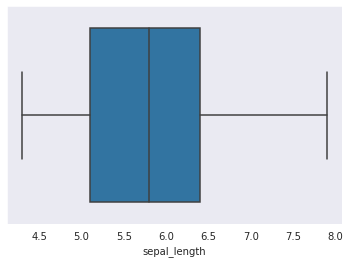

In [14]:
# vẽ theo cách 1
sns.boxplot(iris.sepal_length)

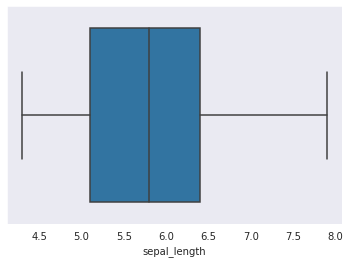

In [15]:
# vẽ theo cách 2
sns.boxplot(x = 'sepal_length', data = iris)

### Cách đọc box plot


## Histogram

### Giới thiệu
Histogram là biểu đồ dùng để thể hiện tần suất của dữ liệu liên tục, điều mà box plot không làm được.
![histogram](https://chartio.com/images/tutorials/charts/histograms/histogram-example-1.png)

Histogram bao gồm các cột liền nhau : mỗi cột tương ứng với một khoảng dữ liệu (gọi là ngăn dữ liệu), chiều cao cột là tần số (số lần xuất hiện) của dữ liệu nằm trong ngăn đó.

### Vẽ thủ công
Cho bộ dữ liệu $[36, 25, 38, 46, 55, 68, 72, 55, 36, 38, 67, 45, 22, 48, 91, 46, 52, 61, 58, 55]$. 

Đầu tiên, chúng ta chia thành từng ngăn như sau :

Ngăn dữ liệu | Tần số | Các phần tử
--- | --- | --- 
$[20, 30)$ | $2$ | $25, 22$
$[30, 40)$ | $4$ | $36, 38, 36, 38$
$[40, 50)$ | $4$ | $46, 45, 48, 46$
$[50, 60)$ | $5$ | $55, 55, 52, 58, 55$
$[60, 70)$ | $3$ | $68, 67, 61$
$[70, 80)$ | $1$ | $72$
$[80, 90)$ | $0$ | $-$
$[90, 100)$ | $1$ | $91$

Sau đó, dựng các cột theo từng ngăn dữ liệu, chiều cao cột sẽ tỷ lệ với tần số.

Bạn sẽ được một hình vẽ giống như thế này

![hist](https://i.imgur.com/sMYz2gN.png)

### Vẽ bằng `seaborn`
Để vẽ histogram trong `seaborn`, bạn có thể dùng :
`sns.distplot(<dữ_liệu>, kde = False)`. Trong đó, `dữ_liệu` có thể là `list`, `Series`

Bạn có thể thay đổi sô lượng ngăn dữ liệu bằng tham số `bins`.

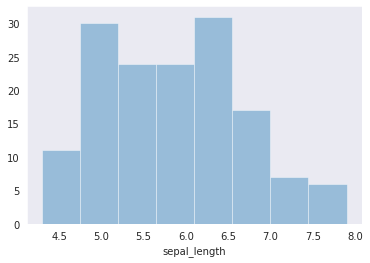

In [39]:
# vẽ theo cách 1
sns.distplot(iris.sepal_length, kde = False)

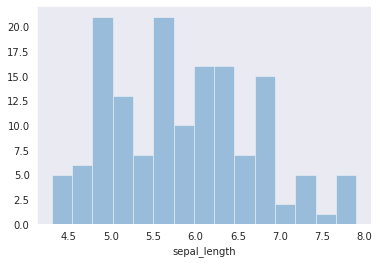

In [70]:
# dùng 15 ngăn dữ liệu
sns.distplot(iris.sepal_length, kde = False, bins = 15)

### Cách đọc histogram

## KDE plot
Histogram là một công cụ tốt để tìm hiểu phân bố của dữ liệu một chiều. Tuy nhiên, histogram lại phụ thuộc vào cách chọn ngăn dữ liệu.


![compare_hist](https://i.imgur.com/0ajnXvi.png)

Như bạn có thể thấy :
- Khi số ngăn dữ liệu là 5, histogram chỉ có 1 đỉnh.
- Khi số ngăn dữ liệu là 15, histogram có 6 đỉnh.

Vì vậy, để hiểu chính xác hơn phân bố của dữ liệu, người ta có công cụ là KDE. Đây là công cụ thường dùng để xấp xỉ hàm mật độ xác suất (probability density function).

### Vẽ bằng `seaborn`
Để vẽ kde plot, bạn có thể dùng :
1. `sns.displot(<dữ_liệu>)`, dùng để vẽ histogram và kde plot trên cùng 1 biểu đồ.
2. `sns.kdeplot(<dữ_liệu>)`

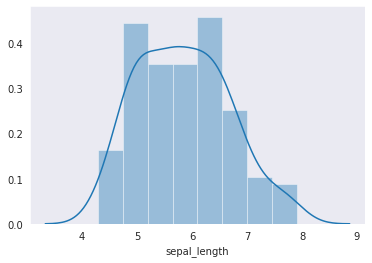

In [71]:
# vẽ theo cách 1
sns.distplot(iris.sepal_length)

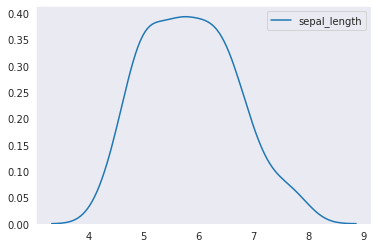

In [73]:
# vẽ theo cách 2
sns.kdeplot(iris.sepal_length)

# Biểu diễn dữ liệu 2 chiều
Chúng ta xét 2 trường hợp :
1. Cả 2 chiều dữ liệu đều là dữ liệu liên tục.
2. Có 1 chiều là dữ liệu phân loại, 1 chiều là dữ liệu liên tục.

## Cả 2 chiều đều là dữ liệu liên tục
Trong trường hợp này, người ta thường dùng đến scatter plot (biểu đồ phân tán).

Biểu đồ này sẽ thể hiện một cặp dữ liệu $(x, y)$ như là một điểm trên mặt phẳng.

Ví dụ, với bộ dữ liệu

$x$ | $y$
--- | ---
$0$ | $0$
$0$ | $1$
$0$ | $2$
$0$ | $3$
$1$ | $0$
$1$ | $1$
$1$ | $2$
$2$ | $0$
$2$ | $1$
$3$ | $0$

Sẽ có scatter plot như sau

![scatter](https://i.imgur.com/oGzBIzo.png)

### Công dụng
Scatter plot cho ta một cái nhìn tổng quan về phân bố của dữ liệu cũng như mức độ phụ thuộc của của dữ liệu đó.

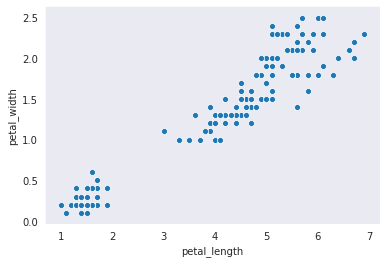

In [46]:
# ví dụ : scatter plot của petal_length và petal_width của dữ liệu iris
sns.scatterplot(x = 'petal_length', y = 'petal_width', data = iris)

Trong ví dụ trên, bạn có thể thấy được :
- Dữ liệu phân thành hai cụm.
- Giữa `petal_length` và `petal_width` có mối quan hệ tỷ lệ thuận khá rõ ràng, tức là nếu `petal_length` tăng thì `petal_width` cũng tăng theo.

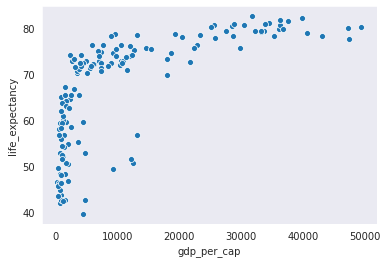

In [48]:
# ví dụ : scatter plot của gdp_per_cap và life_expectancy
sns.scatterplot(x = 'gdp_per_cap', y = 'life_expectancy', data = world_2007)


Bạn có thể thấy được :
- Dữ liệu có 3 cụm (1 cụm nằm tách biệt, 2 cụm còn lại phân không rõ ràng).
- Giữa `life_expectancy` và `gdp_per_cap` có mối quan hệ (phi tuyến tính) tương đối rõ ràng.

### Vẽ bằng `seaborn`
Để vẽ scatter plot, bạn có thể dùng :
1. `sns.scatterplot(x = <dữ_liệu_1>, y = <dữ_liệu_2>)`, hoặc
2. `sns.scatterplot(x = <tên_cột_1>, y = <tên_cột_2>, data = <tên_DataFrame>)`

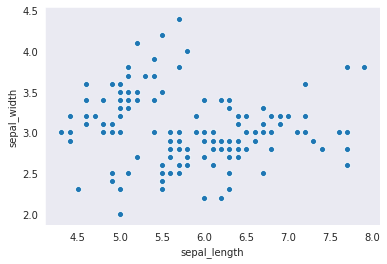

In [49]:
# vẽ bằng cách 1
sns.scatterplot(x = iris.sepal_length, y = iris.sepal_width)

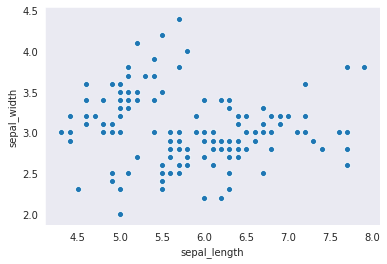

In [50]:
# vẽ bằng cách 2
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', data = iris)

Ngoài ra, bạn có thể dùng `sns.jointplot()` để vẽ scatter plot kèm theo histogram của từng chiều.

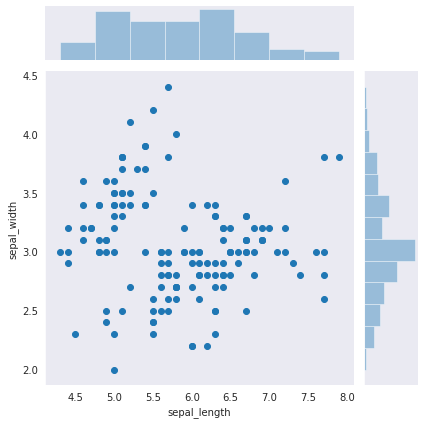

In [52]:
# dùng sns.jointplot tương tự sns.scatterplot
sns.jointplot(x = 'sepal_length', y = 'sepal_width', data = iris)

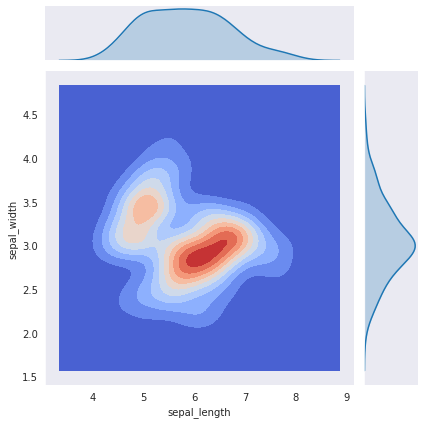

In [54]:
# dùng sns.jointplot để vẽ phân phối chập (xấp xỉ)
sns.jointplot(x = 'sepal_length', y = 'sepal_width', data = iris, kind = 'kde', cmap = 'coolwarm')

## Dữ liệu gồm 1 chiều phân loại, một chiều liên tục
Để biểu diễn, bạn có thể vẽ các box plot, kde, ... tương ứng với từng phân loại trong cùng 1 biểu đồ để so sánh.

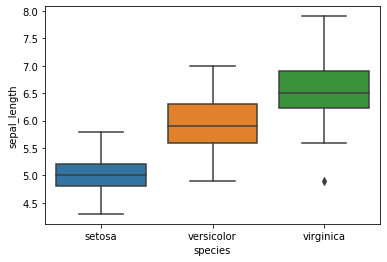

In [0]:
# vẽ nhiều box plot trong cùng 1 biểu đồ
sns.boxplot(x = 'species', y = 'sepal_length', data = iris)

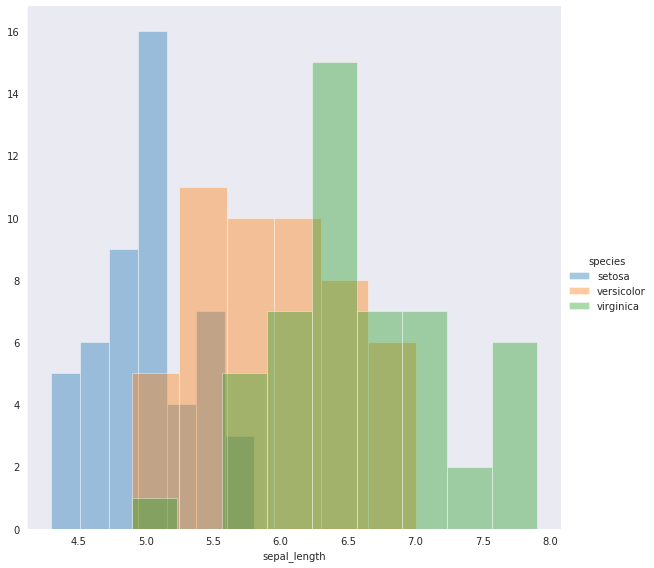

In [69]:
# vẽ nhiều histogram trong cùng một biểu đồ
g = sns.FacetGrid(data = iris, hue = 'species', height = 8)
(g.map(sns.distplot, 'sepal_length', kde = False)).add_legend()

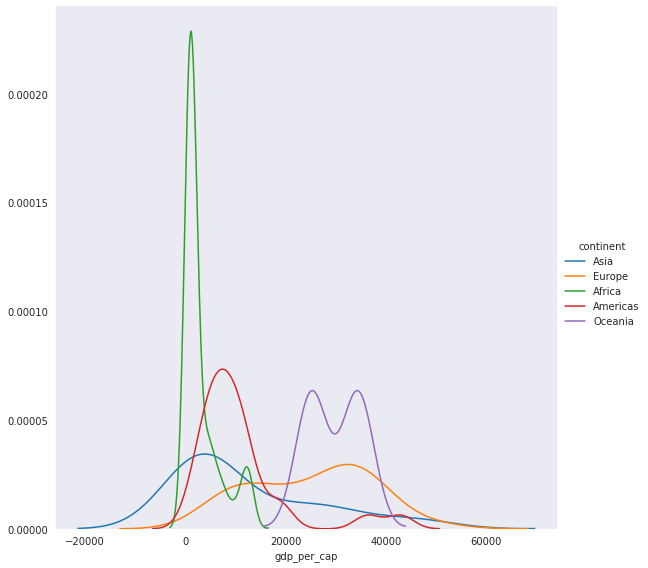

In [66]:
# vẽ nhiều kde plot trong cùng 1 biểu đồ từ dữ liệu world_2017
w = sns.FacetGrid(data = world_2007, hue = 'continent', height = 8)
(w.map(sns.kdeplot, 'gdp_per_cap')).add_legend()

# Biểu diễn dữ liệu nhiều chiều

## Giới thiệu
Việc biểu diễn dữ liệu 1 chiều, 2 chiều đều đơn giản và dễ hiểu. Tuy nhiên, khi tăng số chiều lên, mọi việc bắt đầu khó khăn hơn.

Trong phần này, chúng ta sẽ tìm hiểu về một số cách biểu diễn dữ liệu nhiều chiều.

## Biểu diễn dữ liệu 3 chiều
Cách đầu tiên, đó chính biểu diễn dữ liệu trong một không gian 3 chiều.

### Scatter plot 3 chiều

Tương tự như scatter plot, phiên bản 3 chiều sẽ biểu diễn từng điểm $(x, y, z)$ trong một không gian 3 chiều. 

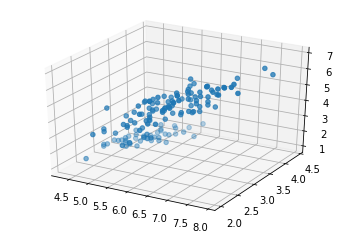

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(iris.sepal_length, iris.sepal_width, iris.petal_length)

Thông thường, ngoài cách dùng scatter plot 3 chiều, bạn có thể dùng các đặc tính như màu sắc, kích thước điểm, ... trong scatter plot để biểu diễn dữ liệu 3 chiều.

### Dùng màu sắc


Đầu tiên, chúng ta có scatter plot sau :

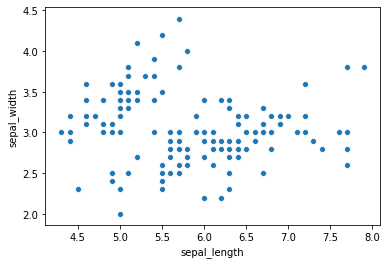

In [0]:
# tham số data là tên DataFrame, khi đó, bạn có thể dùng tên cột
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', data = iris)

Bây giờ, chúng ta thêm màu sắc cho điểm ứng với giống hoa.

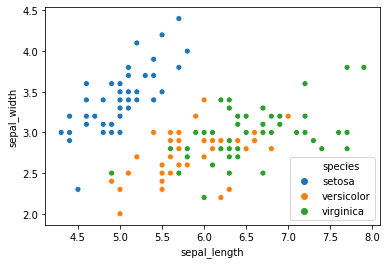

In [0]:
# dùng tham số hue để thêm màu sắc
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', hue = 'species', data = iris)

Bây giờ, bạn có thể thấy rõ ràng rằng giống hoa `serota` có một vùng riêng.

Thông thường, bạn sẽ dùng màu sắc cho kiểu dữ liệu phân loại.

### Dùng kích thước điểm

Đầu tiên, chúng ta sẽ biểu diễn mối liên hệ giữa tuổi thọ trung bình và GDP bình quân

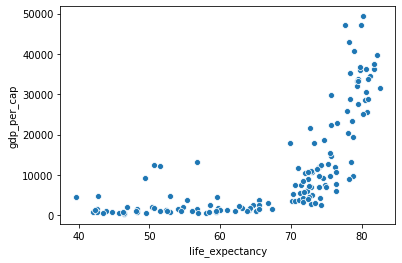

In [0]:
sns.scatterplot(x = 'life_expectancy', y = 'gdp_per_cap', data = data_2007)

Các bạn có thể thấy được rằng, tuổi thọ có liên hệ khá chặt chẽ với GDP bình quân.

Bây giờ, ta thay đổi kích thước điểm dựa trên dân số.

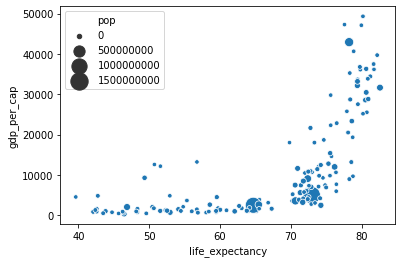

In [0]:
# dùng tham số size để chỉ ra kích thước từng điểm
sns.scatterplot(x = 'life_expectancy', y = 'gdp_per_cap', size = 'pop', sizes = (20, 300), data = data_2007)

Nhu các bạn có thể thấy, các nước có tuổi thọ trên 78 tuổi thì phần lớn có quy mô dân số nhỏ và thu nhập bình quân cao.

Thông thường, bạn sẽ dùng các dữ liệu có khoảng cách lớn ($max/min$ lớn) để làm kích thước điểm.